<a href="https://colab.research.google.com/github/deanhoperobertson/NLP-Text-Classifiation-/blob/master/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib.request
import pandas as pd
import urllib

#vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Text Preprocessing
from bs4 import BeautifulSoup
import unicodedata
import string
import re

from sklearn import model_selection
from sklearn.model_selection import train_test_split



In [0]:
#import data from my github repo
url = "https://raw.githubusercontent.com/deanhoperobertson/NLP-Text-Classifiation-/master/corpus.txt"
data = urllib.request.urlopen(url).read()
data = data.decode('utf-8')

In [0]:
labels, texts = [], []
for i, line in enumerate(str(data).split("\n")):
    content = line.replace("\\","").split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [159]:
trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


## Text PreProcessing (Cleaning)

Here we focus on cleaning up text by:
- Remove upper case characters
- Remove HTML tags
- Remove punctuation
- Remove special characters

In [0]:
#remove upper cases letters
def lower_case(text):
  return text.str.lower()

#remove html tags
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  stripped_text = soup.get_text()
  return stripped_text

#remove punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

#remove special characters
def remove_spec(text):
  return text.replace(r'^[*-]', '')

#remove accented characters
def remove_accented_chars(text):
  nfkd_form = unicodedata.normalize('NFKD', text)
  only_ascii = nfkd_form.encode('ASCII', 'ignore').decode('utf-8', 'ignore')
  return only_ascii

In [0]:
# now to apply all the text cleaning methods

trainDF['text'] = lower_case(trainDF['text'])

trainDF['text'] = trainDF['text'].apply(strip_html)

trainDF['text'] = trainDF['text'].apply(remove_punctuation)

trainDF['text'] = trainDF['text'].apply(remove_spec)


## Train/Test Split

We need to split the dataset into a training and test dataset. It is common practice to use a 80/20 split between train/test dataset. One should split the dataset before using any resampling methods (up-sample/under-sample) to resolved a class imbalance to reduce the chance of deplicating observations. 

In [0]:
#split into train and test set (default is 25%)
#set seed for consistency
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'], test_size=0.25, random_state=1)

## Balance Classes

It is important to check that target category classes are balanced. IThere is much debate as to why it is better to have balanced classes, but without balanced classes one will train a model that is bias. As a conclusion, artificial balancing is rarely useful if training set is large enough.In my personal experience - balancing classes has resulted in better model performance. 

In this case the classes are close enough to called "balanced" and thus no resampling mehods are required. 

In [82]:
#number of classes
trainDF['label'].value_counts()

__label__1    5097
__label__2    4903
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


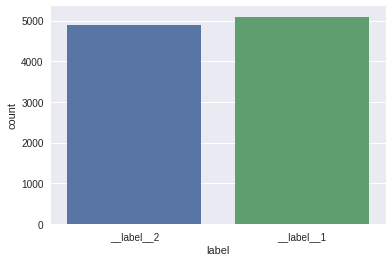

In [83]:
#number of classes
sns.countplot(x="label" ,data=trainDF, ax=None)

In [84]:
#Number of unique words
trainDF['label'].value_counts()

__label__1    5097
__label__2    4903
Name: label, dtype: int64

## Exploratory Analysis

Here we look at interesting insights within our data as well as the some of the keys features that shape it. 

In [164]:
#word count
all_text = trainDF['text'].values

from keras.preprocessing.text import text_to_word_sequence
# estimate the size of the vocabulary
words = set(text_to_word_sequence(str(all_text)))
vocab_size = len(words)
print(vocab_size)


295


In [165]:
# load whole corpus of words
all_text = trainDF['text'].values

test = []

for i in all_text:
  new = i.split()
  test.extend(new)
  
len(set(test))

40180

In [166]:
# load whole corpus of words
all_text = trainDF['text'].values

test = []

for i in all_text:
  new = text_to_word_sequence(i)
  test.extend(new)
  
len(set(test))

40180

In [0]:
word_counts = {}

# iterate over each sentence in the corpus
for text in all_text:
  
  for word in text.split():
    
    # if the word isn't in the dictionary
    if word not in word_counts.keys():
      # create a new index for it, and add 1 to its count
      word_counts[word] = 1
    
    # if word is already in the dictionary
    else:
      # find its key, and add 1 to its count
      word_counts[word] += 1

# create mappings
stoi = {}  # string to index
itos = {}  # index to string

idx = 1

# order the words from most to least common
for word in sorted(word_counts, key=word_counts.get, reverse=True):

    if word not in stoi.keys():
      stoi[word] = idx
      itos[idx] = word
      idx += 1

In [168]:
# how many words in the corpus?
vocabulary_size = len(stoi.keys())
print(vocabulary_size)

40180
